# Q4 - IMDB Dataset
 Mandana Samiei ID: 260779555

In [4]:
import numpy as np 
from numpy import genfromtxt
import matplotlib
import matplotlib.pyplot as plt
import csv
import math
from numpy.linalg import inv
%matplotlib inline  
from io import StringIO
import string
import operator
import random 
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn import tree
from sklearn.svm import LinearSVC
def load_data(file_name):
    f = open(file_name, 'r')
    my_data= f.read()
    return my_data
def split_data(data):
    reviews, targets = [], []
    splitted_txt = data.rstrip('\n').split('\n')
    for i in range(len(splitted_txt)):
        line = splitted_txt[i].split('\t')
        reviews.append(line[0])
        targets.append(line[1])
    return reviews, targets
def pre_process(data):
    rvw = []
    for x in data: 
        rvw.append(x.translate(None, string.punctuation).lower())
    return rvw
def get_vocab(data):
    count = {}
    for x in data:
        rvw = x.split()
        for w in rvw:
            if w in count: 
                count[w] +=1;
            else:
                count[w] = 1;
    v = sorted(count.items(), key=operator.itemgetter(1), reverse=True) # list of vocabularies
    return v
def get_feature_set(vocabulary):
    f_set = []
    for i in range(10000):
        f_set.append(vocabulary[i][0])
    return f_set

# Save Vocabulary

In [46]:
def save_imdb_vocab(name, vocab):
    file = open("myfiles/"+name,"w")
    for i in range(10000):
        text = ""
        try:
            text += str(vocab[i][0])+ '\t'+ str(i+1) +'\t' +str(vocab[i][1])
        except ValueError:
            j=0
        text += '\n'
        file.write(text)

# Save Databases

In [3]:
def save_imdb_dataset(name,rvw,trg,f_set):
    file = open("myfiles/"+name,"w")
    for i in range(len(rvw)):
        words = np.array((rvw[i].split(' ')))
        text = ""
        for word in words:
            try:
                text += str(f_set.index(word)) + ' '
            except ValueError:
                j=0
        text  += '\t' + str(trg[i][0]) + '\n' 
        file.write(text)

# Binary and Frequency Bag of words

In [6]:
def bin_bow(rvw, f_set):
    new_dataset = np.zeros((len(rvw),len(f_set)))
    for i in range(len(rvw)):
        words = rvw[i].split()
        for w in words:
            try:
                new_dataset[i][f_set.index(w)] = 1;
            except ValueError:
                j=0
    return new_dataset
def frq_bow(rvw, f_set):
    new_dataset = np.zeros((len(rvw),len(f_set)))
    fbow = np.zeros((len(rvw),len(f_set)))
    for i in range(len(rvw)):
        words = rvw[i].split()
        for w in words:
            try:
                new_dataset[i][f_set.index(w)] += 1.0;
            except ValueError:
                j=0
        total = sum(new_dataset[i])
        if total != 0:
            fbow[i] = new_dataset[i][:]/float(total)
        else: 
            fbow[i] = new_dataset[i][:]
    return fbow

# Data Maniupulation

In [16]:
#__________IMDB____________
train_IMDB  = load_data('hwk3_datasets/IMDB-train.txt')
test_IMDB   = load_data('hwk3_datasets/IMDB-test.txt')
valid_IMDB  = load_data('hwk3_datasets/IMDB-valid.txt')
IMDB_rvw_train, IMDB_trg_train  = split_data(train_IMDB)
IMDB_rvw_valid, IMDB_trg_valid  = split_data(valid_IMDB)
IMDB_rvw_test, IMDB_trg_test    = split_data(test_IMDB)

IMDB_trg_train_a = np.asarray(IMDB_trg_train)
IMDB_trg_valid_a = np.asarray(IMDB_trg_valid)
IMDB_trg_test_a = np.asarray(IMDB_trg_test)

#_____PRE-PROCESSING_______
IMDB_rvw_train = pre_process(IMDB_rvw_train)
IMDB_rvw_valid = pre_process(IMDB_rvw_valid)
IMDB_rvw_test = pre_process(IMDB_rvw_test)

#_____CREATE VOCABLUARY________
IMDB_v = get_vocab(IMDB_rvw_train)
IMDB_f_set = get_feature_set(IMDB_v)

#_________Binary Bag of Words___________
IMDB_train_bbow = bin_bow(IMDB_rvw_train, IMDB_f_set)
IMDB_valid_bbow = bin_bow(IMDB_rvw_valid, IMDB_f_set)
IMDB_test_bbow = bin_bow(IMDB_rvw_test, IMDB_f_set)

In [20]:
save_imdb_dataset("IMDB-train.txt",IMDB_rvw_train,IMDB_trg_train,IMDB_f_set)
save_imdb_dataset("IMDB-valid.txt",IMDB_rvw_valid,IMDB_trg_valid,IMDB_f_set)
save_imdb_dataset("IMDB-test.txt",IMDB_rvw_test,IMDB_trg_test,IMDB_f_set)

In [47]:
save_imdb_vocab("IMDB-vocab.txt", IMDB_v)

# Random Classification of IMDB Dataset

In [13]:
def random_classifier(data):
    predictions = []
    for i in range(data.shape[0]):
        label = random.randint(0,1)
        predictions.append(label)
    return predictions

In [22]:
prediction = random_classifier(IMDB_test_bbow)
IMDB_trg_tests = [ int(x) for x in IMDB_trg_test ]
print "\nIMDB Confusion Matrix of Random Classifier:\n {}" .format(confusion_matrix(IMDB_trg_tests, prediction))
f1 = f1_score(IMDB_trg_tests, prediction, average='macro')
print "IMDB F1 measure of Random Classifier: {}" .format(f1)


IMDB Confusion Matrix of Random Classifier:
 [[6204 6296]
 [6219 6281]]
IMDB F1 measure of Random Classifier: 0.499395251063


# IMDB: Bernoulli Naive Bayes


_________________________________Bernoulli Naive Bayes_________________________________




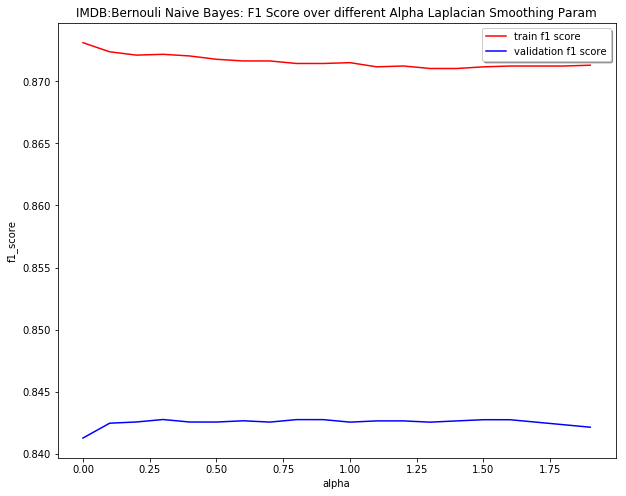


Train set: Maximum F1 score = 0.873103238497 by alpha=0.0

Validation set: Maximum F1 score = 0.842770918909 by alpha=0.3


In [27]:
print "\n_________________________________Bernoulli Naive Bayes_________________________________\n\n"
# The hyperparameter here is alpha which is a laplacian smoothing parameter
# range: 1-100 by scale 2
# best 
alpha = np.arange(0,2,0.1)
f1_list_tr, f1_list_v, f1_list_ts = [], [], []
for i in alpha:
    bnb = BernoulliNB(i,None,True)
    y_pred_valid = bnb.fit(IMDB_train_bbow, IMDB_trg_train).predict(IMDB_valid_bbow)
    y_pred_train = bnb.fit(IMDB_train_bbow, IMDB_trg_train).predict(IMDB_train_bbow)
    f1_v = f1_score(IMDB_trg_valid, y_pred_valid, average='macro')
    f1_tr = f1_score(IMDB_trg_train, y_pred_train, average='macro')
    f1_list_v.append(f1_v)
    f1_list_tr.append(f1_tr)
ax, fig = plt.subplots(0,figsize=(10,8))
plt.plot(alpha, f1_list_tr, color='r', label="train f1 score")
plt.plot(alpha, f1_list_v, color='b', label="validation f1 score")
plt.legend(loc='best', shadow=True)
plt.xlabel('alpha')
plt.ylabel('f1_score')
plt.title('IMDB:Bernouli Naive Bayes: F1 Score over different Alpha Laplacian Smoothing Param')
plt.show()   
print "\nTrain set: Maximum F1 score = {} by alpha={}" .format(max(f1_list_tr),alpha[f1_list_tr.index(max(f1_list_tr))])
print "\nValidation set: Maximum F1 score = {} by alpha={}" .format(max(f1_list_v),alpha[f1_list_v.index(max(f1_list_v))])

In [30]:
bnb = BernoulliNB(0.3,None,True)
y_pred_test = bnb.fit(IMDB_train_bbow, IMDB_trg_train).predict(IMDB_test_bbow)
f1_ts = f1_score(IMDB_trg_test, y_pred_test, average='macro')
print "\nTest set: Maximum F1 score = {} by alpha={}" .format(f1_ts,0.3)


Test set: Maximum F1 score = 0.836094836146 by alpha=0.3


In [38]:
bnb = BernoulliNB(0.3,None,True)
y_pred_test = bnb.fit(IMDB_train_bbow, IMDB_trg_train).predict(IMDB_train_bbow)
f1_ts = f1_score(IMDB_trg_train, y_pred_train, average='macro')
print "\nTrain set: Best F1 score = {} by alpha={}" .format(f1_ts,0.3)


Train set: Best F1 score = 0.827755233198 by alpha=0.3


# IMDB: Binary bag of words: SVM


______________________________Support Vector Machine (SVM)______________________________



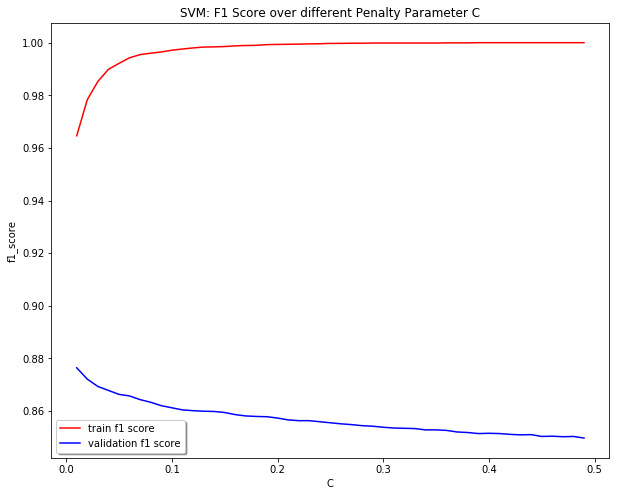


__Train set__Maximum F1 score =1.0 by C=0.39

__Validation set__Maximum F1 score =0.876396123782 by C=0.01


In [8]:
print "\n______________________________Support Vector Machine (SVM)______________________________\n"
#IMDB: 15000*1000 Number of examples are greater than number of features --> Primal Problem 
f1_list_tr, f1_list_v, f1_list_ts = [], [], []
#class sklearn.svm.LinearSVC(penalty=’l2’, loss=’squared_hinge’, dual=True, tol=0.0001, C=1.0, multi_class=’ovr’, 
#fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=1000)
#c_ = np.arange(0.1, 1, 0.01)
c_ = np.arange(0.01, 0.5, 0.01)
for c in c_:
    svc = LinearSVC(C=c, dual=False)
    y_pred_train = svc.fit(IMDB_train_bbow, IMDB_trg_train).predict(IMDB_train_bbow)
    y_pred_valid = svc.fit(IMDB_train_bbow, IMDB_trg_train).predict(IMDB_valid_bbow)
    f1_v = f1_score(IMDB_trg_valid, y_pred_valid, average='macro')
    f1_tr = f1_score(IMDB_trg_train, y_pred_train, average='macro')
    f1_list_v.append(f1_v)
    f1_list_tr.append(f1_tr)
ax, fig = plt.subplots(0,figsize=(10,8))
plt.plot(c_, f1_list_tr, color='r', label="train f1 score")
plt.plot(c_, f1_list_v, color='b', label="validation f1 score")
plt.legend(loc='best', shadow=True)
plt.xlabel('C')
plt.ylabel('f1_score')
plt.title('SVM: F1 Score over different Penalty Parameter C')
plt.show()   
print "\n__Train set__Maximum F1 score ={} by C={}" .format(max(f1_list_tr),c_[f1_list_tr.index(max(f1_list_tr))])
print "\n__Validation set__Maximum F1 score ={} by C={}" .format(max(f1_list_v),c_[f1_list_v.index(max(f1_list_v))])

In [9]:
svc = LinearSVC(C=0.01, dual=False)
y_pred_test = svc.fit(IMDB_train_bbow, IMDB_trg_train).predict(IMDB_test_bbow)
f1_ts = f1_score(IMDB_trg_test, y_pred_test, average='macro')
print "\n__Test set__Best F1 score ={} by C={}" .format(f1_ts,0.01)


__Test set__Best F1 score =0.870638539561 by C=0.01


In [39]:
svc = LinearSVC(C=0.01, dual=False)
y_pred_train = svc.fit(IMDB_train_bbow, IMDB_trg_train).predict(IMDB_train_bbow)
f1_tr = f1_score(IMDB_trg_train, y_pred_train, average='macro')
print "\n__Train set__Best F1 score ={} by C={}" .format(f1_tr,0.01)


__Train set__Best F1 score =0.964599681397 by C=0.01


# IMDB: Binary bag of words: Decision Tree

# criteria: Gini, find the best max depth


_____________________________________Decision Tree______________________________________



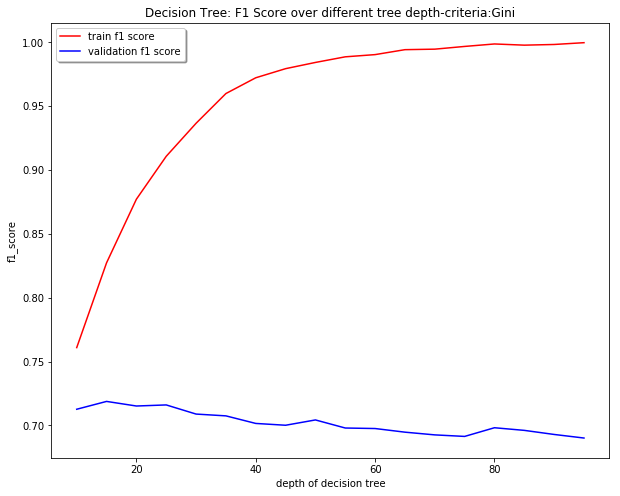


__Train set__Maximum F1 score =0.999666666653 by depth=95

__Validation set__Maximum F1 score =0.718770183921 by depth=15


In [14]:
print "\n_____________________________________Decision Tree______________________________________\n"
f1_list_tr, f1_list_v, f1_list_ts = [], [], []
depth = np.arange(10,100,5)
for i in depth:
        y_pred_train = tree.DecisionTreeClassifier(criterion='gini',max_depth=i).fit(IMDB_train_bbow, IMDB_trg_train_a).predict(IMDB_train_bbow)
        y_pred_valid = tree.DecisionTreeClassifier(criterion='gini',max_depth=i).fit(IMDB_train_bbow, IMDB_trg_train_a).predict(IMDB_valid_bbow)
        f1_v = f1_score(IMDB_trg_valid_a, y_pred_valid, average='macro')
        f1_tr = f1_score(IMDB_trg_train_a, y_pred_train, average='macro')
        f1_list_v.append(f1_v)
        f1_list_tr.append(f1_tr)
ax, fig = plt.subplots(0,figsize=(10,8))
plt.plot(depth, f1_list_tr, color='r', label="train f1 score")
plt.plot(depth, f1_list_v, color='b', label="validation f1 score")
plt.legend(loc='best', shadow=True)
plt.xlabel('depth of decision tree')
plt.ylabel('f1_score')
plt.title('Decision Tree: F1 Score over different tree depth-criteria:Gini')
plt.show()   
print "\n__Train set__Maximum F1 score ={} by depth={}" .format(max(f1_list_tr),depth[f1_list_tr.index(max(f1_list_tr))])
print "\n__Validation set__Maximum F1 score ={} by depth={}" .format(max(f1_list_v),depth[f1_list_v.index(max(f1_list_v))])

In [10]:
y_pred_test = tree.DecisionTreeClassifier(criterion='gini',max_depth=15).fit(IMDB_train_bbow, IMDB_trg_train_a).predict(IMDB_test_bbow)
f1_ts = f1_score(IMDB_trg_test_a, y_pred_test, average='macro')   
print "\n__Test set__Best F1 score ={} by depth={}" .format(f1_ts,15) 


__Test set__Best F1 score =0.726110871834 by depth=15


In [40]:
y_pred_tr = tree.DecisionTreeClassifier(criterion='gini',max_depth=15).fit(IMDB_train_bbow, IMDB_trg_train_a).predict(IMDB_train_bbow)
f1_tr = f1_score(IMDB_trg_train_a, y_pred_tr, average='macro')   
print "\n__Test set__Best F1 score ={} by depth={}" .format(f1_ts,15) 


__Test set__Best F1 score =0.827755233198 by depth=15


# criteria: Entropy, find the best max depth


_____________________________________Decision Tree______________________________________



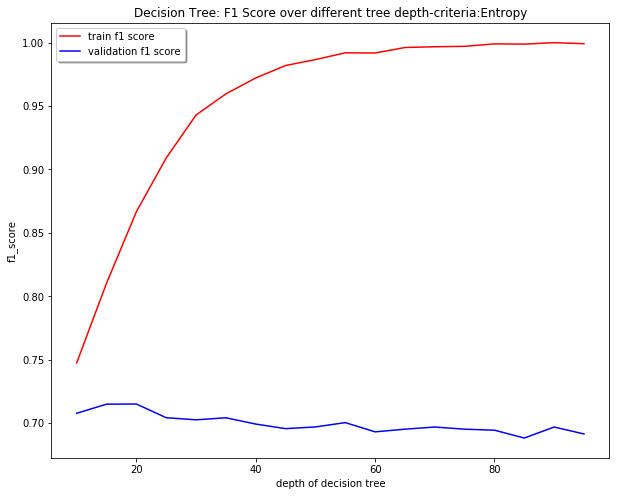


__Train set__Maximum F1 score =1.0 by depth=90

__Validation set__Maximum F1 score =0.715007328161 by depth=20


In [11]:
print "\n_____________________________________Decision Tree______________________________________\n"

depth = np.arange(10,100,5)
for i in depth:
        y_pred_train = tree.DecisionTreeClassifier(criterion='entropy',max_depth=i).fit(IMDB_train_bbow, IMDB_trg_train_a).predict(IMDB_train_bbow)
        y_pred_valid = tree.DecisionTreeClassifier(criterion='entropy',max_depth=i).fit(IMDB_train_bbow, IMDB_trg_train_a).predict(IMDB_valid_bbow)
        f1_v = f1_score(IMDB_trg_valid_a, y_pred_valid, average='macro')
        f1_tr = f1_score(IMDB_trg_train_a, y_pred_train, average='macro')
        f1_list_v.append(f1_v)
        f1_list_tr.append(f1_tr)
ax, fig = plt.subplots(0,figsize=(10,8))
plt.plot(depth, f1_list_tr, color='r', label="train f1 score")
plt.plot(depth, f1_list_v, color='b', label="validation f1 score")
plt.legend(loc='best', shadow=True)
plt.xlabel('depth of decision tree')
plt.ylabel('f1_score')
plt.title('Decision Tree: F1 Score over different tree depth-criteria:Entropy')
plt.show()   
print "\n__Train set__Maximum F1 score ={} by depth={}" .format(max(f1_list_tr),depth[f1_list_tr.index(max(f1_list_tr))])
print "\n__Validation set__Maximum F1 score ={} by depth={}" .format(max(f1_list_v),depth[f1_list_v.index(max(f1_list_v))])


In [15]:
y_pred_test = tree.DecisionTreeClassifier(criterion='entropy',max_depth=20).fit(IMDB_train_bbow, IMDB_trg_train_a).predict(IMDB_test_bbow)
f1_ts = f1_score(IMDB_trg_test_a, y_pred_test, average='macro')   
print "\n__Test set__Best F1 score ={} by depth={}" .format(f1_ts,20) 


__Test set__Best F1 score =0.717827244932 by depth=20


In [44]:
y_pred_train = tree.DecisionTreeClassifier(criterion='entropy',max_depth=20).fit(IMDB_train_bbow, IMDB_trg_train_a).predict(IMDB_train_bbow)
f1_tr = f1_score(IMDB_trg_train_a, y_pred_train, average='macro')   
print "\n__Train set__Best F1 score ={} by depth={}" .format(f1_tr,20) 


__Train set__Best F1 score =0.865584217266 by depth=20


# criteria: Gini, max_depth= 15, find the best min_sample_leaf

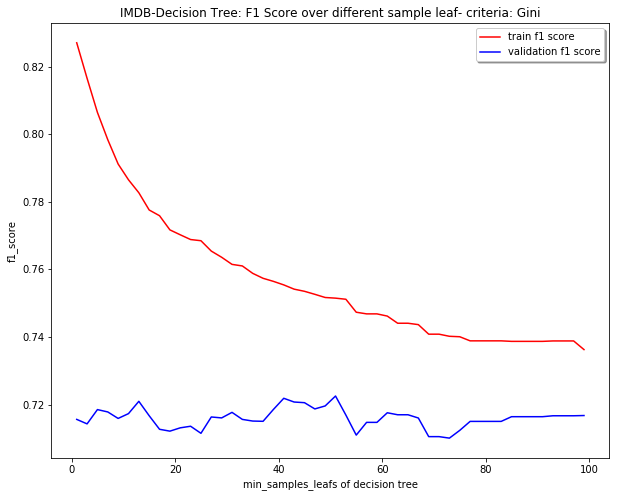


__Train set__Maximum F1 score =0.827023445311 by min_samples_leafs=1

__Validation set__Maximum F1 score =0.722511004245 by min_samples_leafs=51


In [17]:
f1_list_tr, f1_list_v = [], []
min_samples_leafs=np.arange(1,100,2)
for i in min_samples_leafs:
        y_pred_train = tree.DecisionTreeClassifier(criterion='gini',max_depth=15,min_samples_leaf=i).fit(IMDB_train_bbow, IMDB_trg_train).predict(IMDB_train_bbow)
        y_pred_valid = tree.DecisionTreeClassifier(criterion='gini',max_depth=15,min_samples_leaf=i).fit(IMDB_train_bbow, IMDB_trg_train).predict(IMDB_valid_bbow)
        f1_v = f1_score(IMDB_trg_valid, y_pred_valid, average='macro')
        f1_tr = f1_score(IMDB_trg_train, y_pred_train, average='macro')
        f1_list_v.append(f1_v)
        f1_list_tr.append(f1_tr)
ax, fig = plt.subplots(0,figsize=(10,8))
plt.plot(min_samples_leafs, f1_list_tr, color='r', label="train f1 score")
plt.plot(min_samples_leafs, f1_list_v, color='b', label="validation f1 score")
plt.legend(loc='best', shadow=True)
plt.xlabel('min_samples_leafs of decision tree')
plt.ylabel('f1_score')
plt.title('IMDB-Decision Tree: F1 Score over different sample leaf- criteria: Gini')
plt.show()   
print "\n__Train set__Maximum F1 score ={} by min_samples_leafs={}" .format(max(f1_list_tr),min_samples_leafs[f1_list_tr.index(max(f1_list_tr))])
print "\n__Validation set__Maximum F1 score ={} by min_samples_leafs={}" .format(max(f1_list_v),min_samples_leafs[f1_list_v.index(max(f1_list_v))])

In [21]:
y_pred_test = tree.DecisionTreeClassifier(criterion='gini',max_depth=15,min_samples_leaf=51).fit(IMDB_train_bbow, IMDB_trg_train_a).predict(IMDB_test_bbow)
f1_ts = f1_score(IMDB_trg_test_a, y_pred_test, average='macro')   
print "\n__Test set__Best F1 score ={} by criteria: Gini, max_depth={}, min_sample_leaf={}" .format(f1_ts, 15, 51)


__Test set__Best F1 score =0.726066031883 by criteria: Gini, max_depth=15, min_sample_leaf=51


In [45]:
y_pred_train = tree.DecisionTreeClassifier(criterion='gini',max_depth=15,min_samples_leaf=51).fit(IMDB_train_bbow, IMDB_trg_train_a).predict(IMDB_train_bbow)
f1_tr = f1_score(IMDB_trg_train_a, y_pred_train, average='macro')   
print "\n__Train set__Best F1 score ={} by criteria: Gini, max_depth={}, min_sample_leaf={}" .format(f1_ts, 15, 51)


__Train set__Best F1 score =0.827755233198 by criteria: Gini, max_depth=15, min_sample_leaf=51


# criteria: Entropy, max_depth= 20, find the best min_sample_leaf

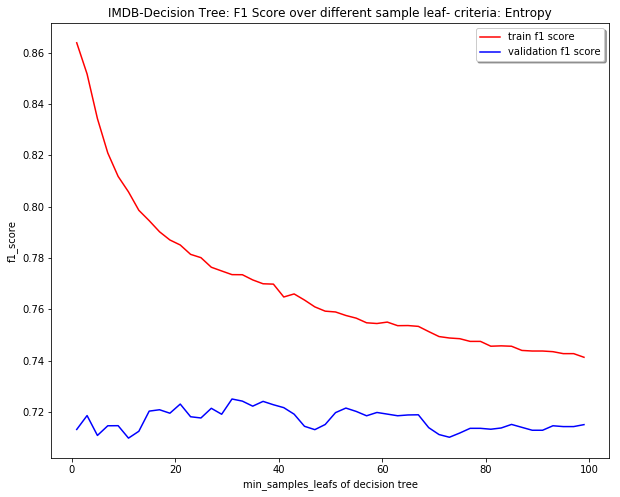


__Train set__Maximum F1 score =0.863808563314 by min_samples_leafs=1

__Validation set__Maximum F1 score =0.725031663415 by min_samples_leafs=31


In [25]:
f1_list_tr, f1_list_v = [], []
min_samples_leafs=np.arange(1,100,2)
for i in min_samples_leafs:
        y_pred_train = tree.DecisionTreeClassifier(criterion='entropy',max_depth=20,min_samples_leaf=i).fit(IMDB_train_bbow, IMDB_trg_train).predict(IMDB_train_bbow)
        y_pred_valid = tree.DecisionTreeClassifier(criterion='entropy',max_depth=20,min_samples_leaf=i).fit(IMDB_train_bbow, IMDB_trg_train).predict(IMDB_valid_bbow)
        f1_v = f1_score(IMDB_trg_valid, y_pred_valid, average='macro')
        f1_tr = f1_score(IMDB_trg_train, y_pred_train, average='macro')
        f1_list_v.append(f1_v)
        f1_list_tr.append(f1_tr)
ax, fig = plt.subplots(0,figsize=(10,8))
plt.plot(min_samples_leafs, f1_list_tr, color='r', label="train f1 score")
plt.plot(min_samples_leafs, f1_list_v, color='b', label="validation f1 score")
plt.legend(loc='best', shadow=True)
plt.xlabel('min_samples_leafs of decision tree')
plt.ylabel('f1_score')
plt.title('IMDB-Decision Tree: F1 Score over different sample leaf- criteria: Entropy')
plt.show()   
print "\n__Train set__Maximum F1 score ={} by min_samples_leafs={}" .format(max(f1_list_tr),min_samples_leafs[f1_list_tr.index(max(f1_list_tr))])
print "\n__Validation set__Maximum F1 score ={} by min_samples_leafs={}" .format(max(f1_list_v),min_samples_leafs[f1_list_v.index(max(f1_list_v))])

In [32]:
y_pred_test = tree.DecisionTreeClassifier(criterion='entropy',max_depth=20,min_samples_leaf=31).fit(IMDB_train_bbow, IMDB_trg_train_a).predict(IMDB_test_bbow)
f1_ts = f1_score(IMDB_trg_test_a, y_pred_test, average='macro')   
print "\n__Test set__Best F1 score ={} by criteria: Entropy, max_depth={}, min_sample_leaf={}" .format(f1_ts,20, 31)


__Test set__Best F1 score =0.730862267338 by criteria: Entropy, max_depth=20, min_sample_leaf=31


In [49]:
y_pred_train = tree.DecisionTreeClassifier(criterion='entropy',max_depth=20,min_samples_leaf=31).fit(IMDB_train_bbow, IMDB_trg_train_a).predict(IMDB_train_bbow)
f1_tr = f1_score(IMDB_trg_train_a, y_pred_train, average='macro')   
print "\n__Train set__Best F1 score ={} by criteria: Entropy, max_depth={}, min_sample_leaf={}" .format(f1_ts,20, 31)


__Train set__Best F1 score =0.827755233198 by criteria: Entropy, max_depth=20, min_sample_leaf=31


# criteria=Gini, max_depth=15, min_sample_leaf=51, find the best max_leaf_nodes

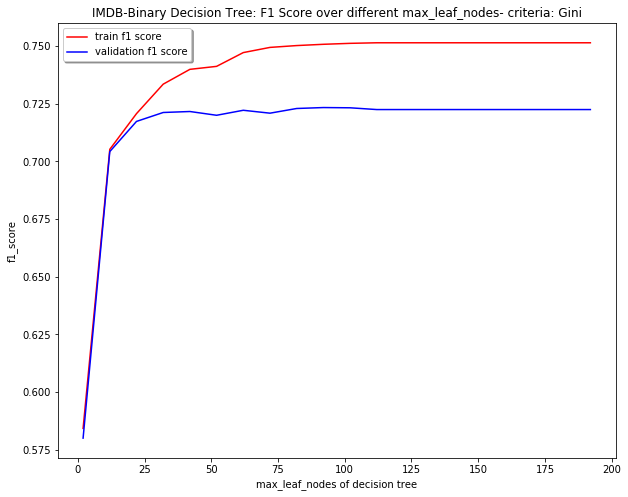


__Train set__Maximum F1 score =0.751468194117 by max_leaf_nodes=112

__Validation set__Maximum F1 score =0.723377425928 by max_leaf_nodes=92


In [33]:
f1_list_tr, f1_list_v = [], []
max_leaf_nodes_= np.arange(2,200,10)
for i in max_leaf_nodes_:
        y_pred_train = tree.DecisionTreeClassifier(criterion='gini',max_depth=15,min_samples_leaf=51,max_leaf_nodes=i).fit(IMDB_train_bbow, IMDB_trg_train).predict(IMDB_train_bbow)
        y_pred_valid = tree.DecisionTreeClassifier(criterion='gini',max_depth=15,min_samples_leaf=51,max_leaf_nodes=i).fit(IMDB_train_bbow, IMDB_trg_train).predict(IMDB_valid_bbow)
        f1_v = f1_score(IMDB_trg_valid, y_pred_valid, average='macro')
        f1_tr = f1_score(IMDB_trg_train, y_pred_train, average='macro')
        f1_list_v.append(f1_v)
        f1_list_tr.append(f1_tr)
ax, fig = plt.subplots(0,figsize=(10,8))
plt.plot(max_leaf_nodes_, f1_list_tr, color='r', label="train f1 score")
plt.plot(max_leaf_nodes_, f1_list_v, color='b', label="validation f1 score")
plt.legend(loc='best', shadow=True)
plt.xlabel('max_leaf_nodes of decision tree')
plt.ylabel('f1_score')
plt.title('IMDB-Binary Decision Tree: F1 Score over different max_leaf_nodes- criteria: Gini')
plt.show()   
print "\n__Train set__Maximum F1 score ={} by max_leaf_nodes={}" .format(max(f1_list_tr),max_leaf_nodes_[f1_list_tr.index(max(f1_list_tr))])
print "\n__Validation set__Maximum F1 score ={} by max_leaf_nodes={}" .format(max(f1_list_v),max_leaf_nodes_[f1_list_v.index(max(f1_list_v))])

In [19]:
y_pred_test = tree.DecisionTreeClassifier(criterion='gini',max_depth=15,min_samples_leaf=51,max_leaf_nodes=92).fit(IMDB_train_bbow, IMDB_trg_train_a).predict(IMDB_test_bbow)
f1_ts = f1_score(IMDB_trg_test_a, y_pred_test, average='macro')   
print "\n__Test set__Best F1 score ={} by criteria: Gini, max_depth={}, min_sample_leaf={}, max_leaf_nodes=92" .format(f1_ts,15, 51)


__Test set__Best F1 score =0.727187525687 by criteria: Gini, max_depth=20, min_sample_leaf=31, max_leaf_nodes=92


In [43]:
y_pred_train= tree.DecisionTreeClassifier(criterion='gini',max_depth=15,min_samples_leaf=51,max_leaf_nodes=92).fit(IMDB_train_bbow, IMDB_trg_train_a).predict(IMDB_train_bbow)
f1_tr = f1_score(IMDB_trg_train_a, y_pred_train, average='macro')   
print "\n__Test set__Best F1 score ={} by criteria: Gini, max_depth={}, min_sample_leaf={}, max_leaf_nodes=92" .format(f1_tr,15, 51)


__Test set__Best F1 score =0.750810961476 by criteria: Gini, max_depth=15, min_sample_leaf=51, max_leaf_nodes=92


# criteria=Entropy, max_depth=20, min_sample_leaf=31, find the best max_leaf_nodes

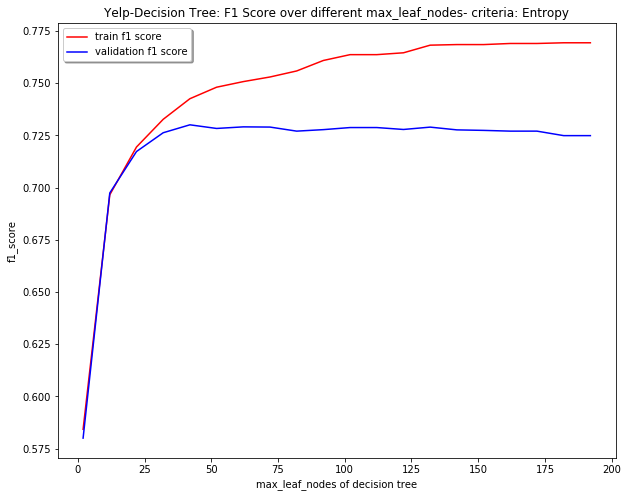


__Train set__Maximum F1 score =0.769392553955 by max_leaf_nodes=182

__Validation set__Maximum F1 score =0.730098572221 by max_leaf_nodes=42


In [34]:
f1_list_tr, f1_list_v = [], []
max_leaf_nodes_= np.arange(2,200,10)
for i in max_leaf_nodes_:
        y_pred_train = tree.DecisionTreeClassifier(criterion='entropy',max_depth=20,min_samples_leaf=31,max_leaf_nodes=i).fit(IMDB_train_bbow, IMDB_trg_train).predict(IMDB_train_bbow)
        y_pred_valid = tree.DecisionTreeClassifier(criterion='entropy',max_depth=20,min_samples_leaf=31,max_leaf_nodes=i).fit(IMDB_train_bbow, IMDB_trg_train).predict(IMDB_valid_bbow)
        f1_v = f1_score(IMDB_trg_valid, y_pred_valid, average='macro')
        f1_tr = f1_score(IMDB_trg_train, y_pred_train, average='macro')
        f1_list_v.append(f1_v)
        f1_list_tr.append(f1_tr)
ax, fig = plt.subplots(0,figsize=(10,8))
plt.plot(max_leaf_nodes_, f1_list_tr, color='r', label="train f1 score")
plt.plot(max_leaf_nodes_, f1_list_v, color='b', label="validation f1 score")
plt.legend(loc='best', shadow=True)
plt.xlabel('max_leaf_nodes of decision tree')
plt.ylabel('f1_score')
plt.title('Yelp-Decision Tree: F1 Score over different max_leaf_nodes- criteria: Entropy')
plt.show()   
print "\n__Train set__Maximum F1 score ={} by max_leaf_nodes={}" .format(max(f1_list_tr),max_leaf_nodes_[f1_list_tr.index(max(f1_list_tr))])
print "\n__Validation set__Maximum F1 score ={} by max_leaf_nodes={}" .format(max(f1_list_v),max_leaf_nodes_[f1_list_v.index(max(f1_list_v))])

In [20]:
y_pred_test = tree.DecisionTreeClassifier(criterion='entropy',max_depth=20,min_samples_leaf=31,max_leaf_nodes=42).fit(IMDB_train_bbow, IMDB_trg_train_a).predict(IMDB_test_bbow)
f1_ts = f1_score(IMDB_trg_test_a, y_pred_test, average='macro')   
print "\n__Test set__Best F1 score ={} by criteria: Entropy, max_depth={}, min_sample_leaf={}, max_leaf_nodes=42" .format(f1_ts,20, 31)


__Test set__Best F1 score =0.728079984337 by criteria: Entropy, max_depth=20, min_sample_leaf=31, max_leaf_nodes=42


In [23]:
y_pred_train = tree.DecisionTreeClassifier(criterion='entropy',max_depth=20,min_samples_leaf=31,max_leaf_nodes=42).fit(IMDB_train_bbow, IMDB_trg_train_a).predict(IMDB_train_bbow)
f1_tr = f1_score(IMDB_trg_train_a, y_pred_train, average='macro')   
print "\n__Test set__Best F1 score ={} by criteria: Entropy, max_depth={}, min_sample_leaf={}, max_leaf_nodes=42" .format(f1_tr,20, 31)


__Test set__Best F1 score =0.742599907336 by criteria: Entropy, max_depth=20, min_sample_leaf=31, max_leaf_nodes=42


# IMDB: Frequency bag of words representation

In [22]:
#_____Frequecy Bag of Words______
IMDB_train_fbow = frq_bow(IMDB_rvw_train, IMDB_f_set)
IMDB_valid_fbow = frq_bow(IMDB_rvw_valid, IMDB_f_set)
IMDB_test_fbow  = frq_bow(IMDB_rvw_test, IMDB_f_set)
print IMDB_train_fbow.shape
print IMDB_valid_fbow.shape
print IMDB_test_fbow.shape

(15000, 10000)
(10000, 10000)
(25000, 10000)


# IMDB: Frequency bag of words: Gaussian Naive Bayes

In [30]:
print "\n_______________________Gaussian Naive Bayes for Frequency Bag of Words_________________________\n"
gnb = GaussianNB()
y_pred_train = gnb.fit(IMDB_train_fbow, IMDB_trg_train).predict(IMDB_train_fbow)
y_pred_valid = gnb.fit(IMDB_train_fbow, IMDB_trg_train).predict(IMDB_valid_fbow)
y_pred_test = gnb.fit(IMDB_train_fbow, IMDB_trg_train).predict(IMDB_test_fbow)
f1_tr = f1_score(IMDB_trg_train, y_pred_train, average='macro')
f1_v = f1_score(IMDB_trg_valid, y_pred_valid, average='macro')
f1_ts = f1_score(IMDB_trg_test, y_pred_test, average='macro')
print "\nTrain set: Maximum F1 score = {}" .format(f1_tr)
print "\nValidation set: Maximum F1 score = {}" .format(f1_v)
print "\nTest set: Maximum F1 score = {}" .format(f1_ts)


_______________________Gaussian Naive Bayes for Frequency Bag of Words_________________________


Train set: Maximum F1 score = 0.863360059737

Validation set: Maximum F1 score = 0.76141198613

Test set: Maximum F1 score = 0.695851692996


# IMDB: Frequency bag of words: SVM


______________________________Support Vector Machine (SVM)______________________________



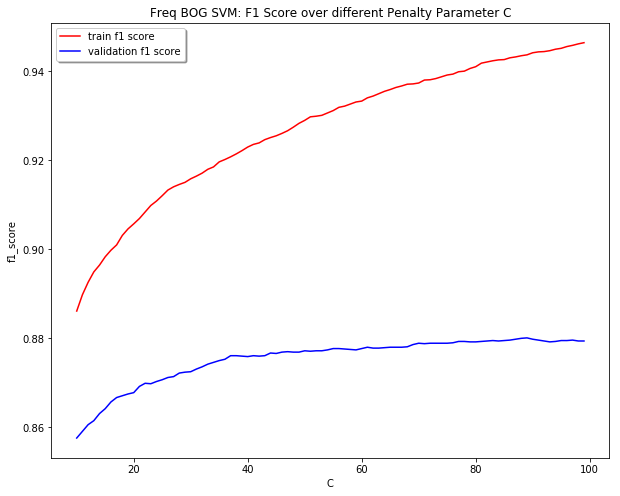


__Train set__Maximum F1 score =0.946466141083 by C=99

__Validation set__Maximum F1 score =0.880090501969 by C=89


In [50]:
print "\n______________________________Support Vector Machine (SVM)______________________________\n"
#IMDB: 15000*1000 Number of examples are greater than number of features --> Dual Problem 
f1_list_tr, f1_list_v, f1_list_ts = [], [], []
#class sklearn.svm.LinearSVC(penalty=’l2’, loss=’squared_hinge’, dual=True, tol=0.0001, C=1.0, multi_class=’ovr’, 
#fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=1000)
c_ = np.arange(10,100, 1)
for c in c_:
    svc = LinearSVC(C=c, dual=False)
    y_pred_train = svc.fit(IMDB_train_fbow, IMDB_trg_train).predict(IMDB_train_fbow)
    y_pred_valid = svc.fit(IMDB_train_fbow, IMDB_trg_train).predict(IMDB_valid_fbow)
    f1_tr = f1_score(IMDB_trg_train, y_pred_train, average='macro')
    f1_v = f1_score(IMDB_trg_valid, y_pred_valid, average='macro')
    f1_list_v.append(f1_v)
    f1_list_tr.append(f1_tr)
ax, fig = plt.subplots(0,figsize=(10,8))
plt.plot(c_, f1_list_tr, color='r', label="train f1 score")
plt.plot(c_, f1_list_v, color='b', label="validation f1 score")
plt.legend(loc='best', shadow=True)
plt.xlabel('C')
plt.ylabel('f1_score')
plt.title('Freq BOG SVM: F1 Score over different Penalty Parameter C')
plt.show()   
print "\n__Train set__Maximum F1 score ={} by C={}" .format(max(f1_list_tr),c_[f1_list_tr.index(max(f1_list_tr))])
print "\n__Validation set__Maximum F1 score ={} by C={}" .format(max(f1_list_v),c_[f1_list_v.index(max(f1_list_v))])

In [51]:
svc = LinearSVC(C=89, dual=False)
y_pred_test = svc.fit(IMDB_train_fbow, IMDB_trg_train).predict(IMDB_test_fbow)
f1_ts = f1_score(IMDB_trg_test, y_pred_test, average='macro')
print "\n__Test set__Best F1 score ={} by C={}" .format(f1_ts,89)


__Test set__Best F1 score =0.875238816466 by C=89


In [53]:
svc = LinearSVC(C=89, dual=False)
y_pred_train = svc.fit(IMDB_train_fbow, IMDB_trg_train).predict(IMDB_train_fbow)
f1_tr = f1_score(IMDB_trg_train, y_pred_train, average='macro')
print "\n__Test set__Best F1 score ={} by C={}" .format(f1_tr,89)


__Test set__Best F1 score =0.943732372032 by C=89


# IMDB: Frequency bag of words: Decision Tree

# Criteria: Gini, find the max_depth


_____________________________________Decision Tree______________________________________



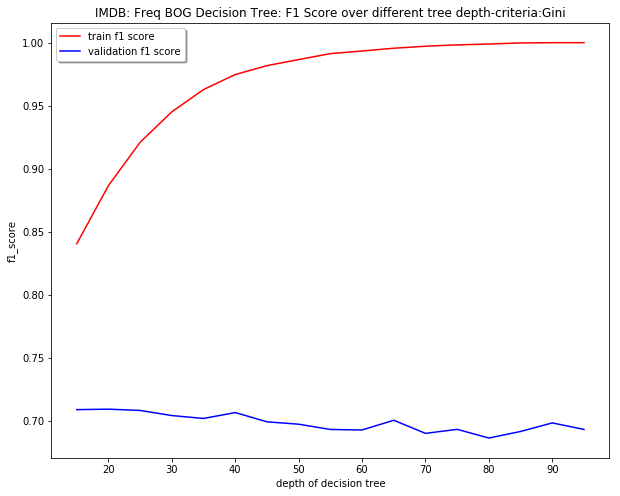


__Train set__Maximum F1 score =1.0 by depth=90

__Validation set__Maximum F1 score =0.709298754693 by depth=20


In [29]:
print "\n_____________________________________Decision Tree______________________________________\n"
#Decision Trees (DTs) are a non-parametric supervised learning method used for classification 
#and regression. The goal is to create a mode that predicts the value of a target variable 
#by learning simple decision rules inferred from the data features.
f1_list_tr, f1_list_v = [], []
depth = np.arange(15,100,5)
for i in depth:
        y_pred_train = tree.DecisionTreeClassifier(criterion='gini',max_depth=i).fit(IMDB_train_fbow, IMDB_trg_train).predict(IMDB_train_fbow)
        y_pred_valid = tree.DecisionTreeClassifier(criterion='gini',max_depth=i).fit(IMDB_train_fbow, IMDB_trg_train).predict(IMDB_valid_fbow)
        y_pred_test = tree.DecisionTreeClassifier(max_depth=i).fit(IMDB_train_fbow, IMDB_trg_train).predict(IMDB_test_fbow)
        f1_v = f1_score(IMDB_trg_valid, y_pred_valid, average='macro')
        f1_tr = f1_score(IMDB_trg_train, y_pred_train, average='macro')
        f1_list_v.append(f1_v)
        f1_list_tr.append(f1_tr)
ax, fig = plt.subplots(0,figsize=(10,8))
plt.plot(depth, f1_list_tr, color='r', label="train f1 score")
plt.plot(depth, f1_list_v, color='b', label="validation f1 score")
plt.legend(loc='best', shadow=True)
plt.xlabel('depth of decision tree')
plt.ylabel('f1_score')
plt.title('IMDB: Freq BOG Decision Tree: F1 Score over different tree depth-criteria:Gini')
plt.show()   
print "\n__Train set__Maximum F1 score ={} by depth={}" .format(max(f1_list_tr),depth[f1_list_tr.index(max(f1_list_tr))])
print "\n__Validation set__Maximum F1 score ={} by depth={}" .format(max(f1_list_v),depth[f1_list_v.index(max(f1_list_v))])

In [29]:
y_pred_test = tree.DecisionTreeClassifier(criterion='gini',max_depth=20).fit(IMDB_train_fbow, IMDB_trg_train).predict(IMDB_test_fbow)
f1_ts = f1_score(IMDB_trg_test, y_pred_test, average='macro')  
print "\n__Test set_Best F1 score ={} by max_depth={}" .format(f1_ts,20)


__Test set_Best F1 score =0.714573021789 by max_depth=20


In [30]:
y_pred_train = tree.DecisionTreeClassifier(criterion='gini',max_depth=20).fit(IMDB_train_fbow, IMDB_trg_train).predict(IMDB_train_fbow)
f1_ts = f1_score(IMDB_trg_train, y_pred_train, average='macro')  
print "\n__Test set_Best F1 score ={} by max_depth={}" .format(f1_ts,20)


__Test set_Best F1 score =0.886051113833 by max_depth=20


# Criteria: Gini, max_depth=20, find the min_sample_leaf

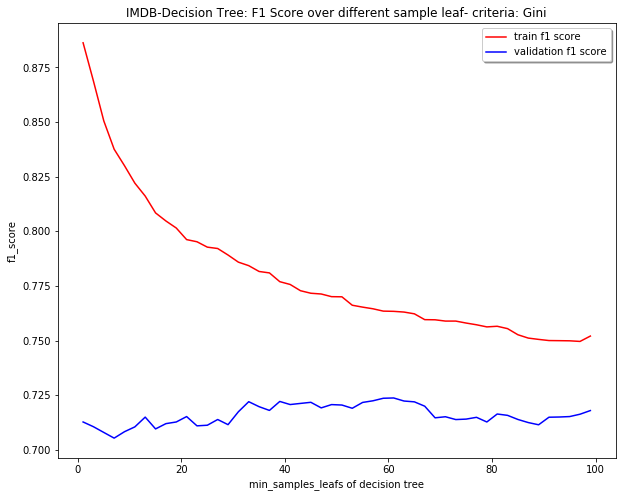


__Train set__Maximum F1 score =0.8862475063 by min_samples_leafs=1

__Validation set__Maximum F1 score =0.723741322425 by min_samples_leafs=61


In [32]:
f1_list_tr, f1_list_v = [], []
min_samples_leafs=np.arange(1,100,2)
for i in min_samples_leafs:
        y_pred_train = tree.DecisionTreeClassifier(criterion='gini',max_depth=20,min_samples_leaf=i).fit(IMDB_train_fbow, IMDB_trg_train).predict(IMDB_train_fbow)
        y_pred_valid = tree.DecisionTreeClassifier(criterion='gini',max_depth=20,min_samples_leaf=i).fit(IMDB_train_fbow, IMDB_trg_train).predict(IMDB_valid_fbow)
        f1_v = f1_score(IMDB_trg_valid, y_pred_valid, average='macro')
        f1_tr = f1_score(IMDB_trg_train, y_pred_train, average='macro')
        f1_list_v.append(f1_v)
        f1_list_tr.append(f1_tr)
ax, fig = plt.subplots(0,figsize=(10,8))
plt.plot(min_samples_leafs, f1_list_tr, color='r', label="train f1 score")
plt.plot(min_samples_leafs, f1_list_v, color='b', label="validation f1 score")
plt.legend(loc='best', shadow=True)
plt.xlabel('min_samples_leafs of decision tree')
plt.ylabel('f1_score')
plt.title('IMDB-Decision Tree: F1 Score over different sample leaf- criteria: Gini')
plt.show()   
print "\n__Train set__Maximum F1 score ={} by min_samples_leafs={}" .format(max(f1_list_tr),min_samples_leafs[f1_list_tr.index(max(f1_list_tr))])
print "\n__Validation set__Maximum F1 score ={} by min_samples_leafs={}" .format(max(f1_list_v),min_samples_leafs[f1_list_v.index(max(f1_list_v))])

In [37]:
y_pred_test = tree.DecisionTreeClassifier(criterion='gini',max_depth=20,min_samples_leaf=61).fit(IMDB_train_fbow, IMDB_trg_train).predict(IMDB_test_fbow)
f1_ts = f1_score(IMDB_trg_test, y_pred_test, average='macro')  
print "\n__Test set_Best F1 score ={} by max_depth={}, min_samples_leaf={}" .format(f1_ts,20,61)


__Test set_Best F1 score =0.723703383453 by max_depth=20, min_samples_leaf=61


In [ ]:
y_pred_train = tree.DecisionTreeClassifier(criterion='gini',max_depth=20,min_samples_leaf=61).fit(IMDB_train_fbow, IMDB_trg_train).predict(IMDB_train_fbow)
f1_ts = f1_score(IMDB_trg_train, y_pred_train, average='macro')  
print "\n__Test set_Best F1 score ={} by max_depth={}, min_samples_leaf={}" .format(f1_ts,20)

# Criteria: Gini, max_depth=20, min_sample_leaf=, find the max_leaf_nodes

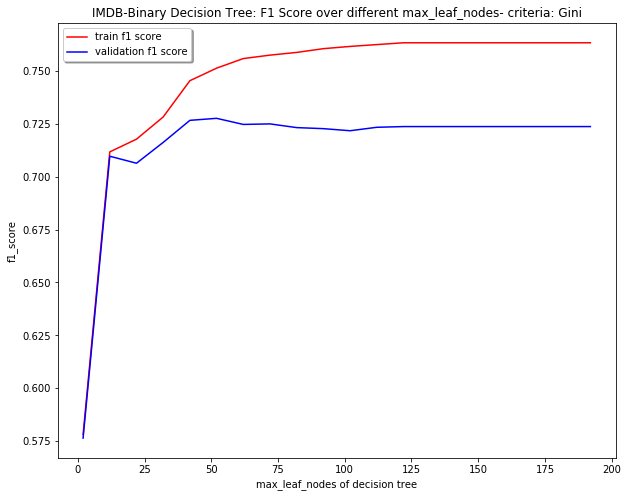


__Train set__Maximum F1 score =0.763372551818 by max_leaf_nodes=122

__Validation set__Maximum F1 score =0.727642736885 by max_leaf_nodes=52


In [54]:
f1_list_tr, f1_list_v = [], []
max_leaf_nodes_= np.arange(2,200,10)
for i in max_leaf_nodes_:
        y_pred_train = tree.DecisionTreeClassifier(criterion='gini',max_depth=20,min_samples_leaf=61,max_leaf_nodes=i).fit(IMDB_train_fbow, IMDB_trg_train).predict(IMDB_train_fbow)
        y_pred_valid = tree.DecisionTreeClassifier(criterion='gini',max_depth=20,min_samples_leaf=61,max_leaf_nodes=i).fit(IMDB_train_fbow, IMDB_trg_train).predict(IMDB_valid_fbow)
        f1_v = f1_score(IMDB_trg_valid, y_pred_valid, average='macro')
        f1_tr = f1_score(IMDB_trg_train, y_pred_train, average='macro')
        f1_list_v.append(f1_v)
        f1_list_tr.append(f1_tr)
ax, fig = plt.subplots(0,figsize=(10,8))
plt.plot(max_leaf_nodes_, f1_list_tr, color='r', label="train f1 score")
plt.plot(max_leaf_nodes_, f1_list_v, color='b', label="validation f1 score")
plt.legend(loc='best', shadow=True)
plt.xlabel('max_leaf_nodes of decision tree')
plt.ylabel('f1_score')
plt.title('IMDB-Binary Decision Tree: F1 Score over different max_leaf_nodes- criteria: Gini')
plt.show()   
print "\n__Train set__Maximum F1 score ={} by max_leaf_nodes={}" .format(max(f1_list_tr),max_leaf_nodes_[f1_list_tr.index(max(f1_list_tr))])
print "\n__Validation set__Maximum F1 score ={} by max_leaf_nodes={}" .format(max(f1_list_v),max_leaf_nodes_[f1_list_v.index(max(f1_list_v))])

In [56]:
y_pred_test = tree.DecisionTreeClassifier(criterion='gini',max_depth=20,min_samples_leaf=61,max_leaf_nodes=52).fit(IMDB_train_fbow, IMDB_trg_train_a).predict(IMDB_test_fbow)
f1_ts = f1_score(IMDB_trg_test_a, y_pred_test, average='macro')   
print "\n__Test set__Best F1 score ={} by criteria: Gini, max_depth={}, min_sample_leaf={}, max_leaf_nodes=52" .format(f1_ts,20, 61)


__Test set__Best F1 score =0.727997363478 by criteria: Gini, max_depth=20, min_sample_leaf=61, max_leaf_nodes=52


In [59]:
y_pred_test = tree.DecisionTreeClassifier(criterion='gini',max_depth=20,min_samples_leaf=61,max_leaf_nodes=52).fit(IMDB_train_fbow, IMDB_trg_train_a).predict(IMDB_train_fbow)
f1_tr = f1_score(IMDB_trg_train_a, y_pred_train, average='macro')   
print "\n__Train set__Best F1 score ={} by criteria: Gini, max_depth={}, min_sample_leaf={}, max_leaf_nodes=52" .format(f1_ts,20, 61)


__Train set__Best F1 score =0.727997363478 by criteria: Gini, max_depth=20, min_sample_leaf=61, max_leaf_nodes=52


# Criteria: Entropy, find the max_depth

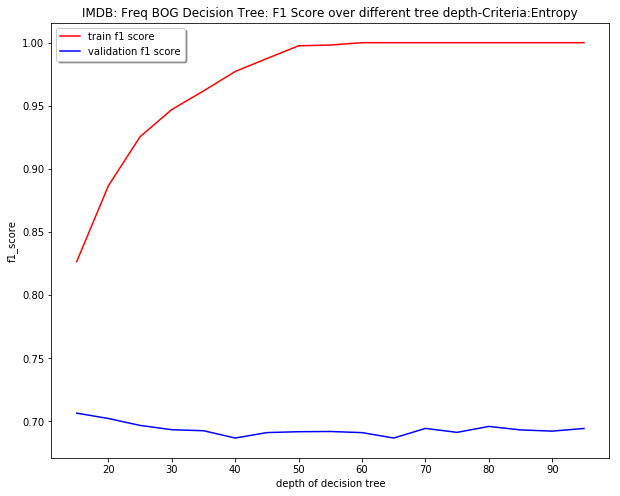


__Train set__Maximum F1 score =1.0 by depth=60

__Validation set__Maximum F1 score =0.706492663159 by depth=15


In [31]:
f1_list_tr, f1_list_v = [], []
depth = np.arange(15,100,5)
for i in depth:
        y_pred_train = tree.DecisionTreeClassifier(criterion='entropy',max_depth=i).fit(IMDB_train_fbow, IMDB_trg_train).predict(IMDB_train_fbow)
        y_pred_valid = tree.DecisionTreeClassifier(criterion='entropy',max_depth=i).fit(IMDB_train_fbow, IMDB_trg_train).predict(IMDB_valid_fbow)
        y_pred_test = tree.DecisionTreeClassifier(max_depth=i).fit(IMDB_train_fbow, IMDB_trg_train).predict(IMDB_test_fbow)
        f1_v = f1_score(IMDB_trg_valid, y_pred_valid, average='macro')
        f1_tr = f1_score(IMDB_trg_train, y_pred_train, average='macro')
        f1_list_v.append(f1_v)
        f1_list_tr.append(f1_tr)
ax, fig = plt.subplots(0,figsize=(10,8))
plt.plot(depth, f1_list_tr, color='r', label="train f1 score")
plt.plot(depth, f1_list_v, color='b', label="validation f1 score")
plt.legend(loc='best', shadow=True)
plt.xlabel('depth of decision tree')
plt.ylabel('f1_score')
plt.title('IMDB: Freq BOG Decision Tree: F1 Score over different tree depth-Criteria:Entropy')
plt.show()   
print "\n__Train set__Maximum F1 score ={} by depth={}" .format(max(f1_list_tr),depth[f1_list_tr.index(max(f1_list_tr))])
print "\n__Validation set__Maximum F1 score ={} by depth={}" .format(max(f1_list_v),depth[f1_list_v.index(max(f1_list_v))])

In [28]:
y_pred_test = tree.DecisionTreeClassifier(criterion='entropy',max_depth=15).fit(IMDB_train_fbow, IMDB_trg_train).predict(IMDB_test_fbow)
f1_ts = f1_score(IMDB_trg_test, y_pred_test, average='macro')  
print "\n__Test set_Best F1 score ={} by max_depth={}" .format(f1_ts,15)


__Test set_Best F1 score =0.70574219286 by max_depth=15


In [35]:
y_pred_train = tree.DecisionTreeClassifier(criterion='entropy',max_depth=15).fit(IMDB_train_fbow, IMDB_trg_train).predict(IMDB_train_fbow)
f1_tr = f1_score(IMDB_trg_train, y_pred_train, average='macro')  
print "\n__Test set_Best F1 score ={} by max_depth={}" .format(f1_tr,15)


__Test set_Best F1 score =0.827755233198 by max_depth=15


# Criteria: Entropy, max_depth=15, find the min_sample_leaf

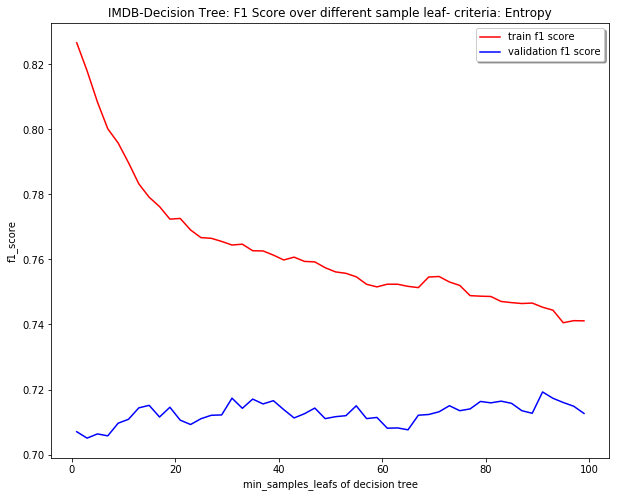


__Train set__Maximum F1 score =0.826622107597 by min_samples_leafs=1

__Validation set__Maximum F1 score =0.719256480546 by min_samples_leafs=91


In [58]:
f1_list_tr, f1_list_v = [], []
min_samples_leafs=np.arange(1,100,2)
for i in min_samples_leafs:
        y_pred_train = tree.DecisionTreeClassifier(criterion='entropy',max_depth=15,min_samples_leaf=i).fit(IMDB_train_fbow, IMDB_trg_train).predict(IMDB_train_fbow)
        y_pred_valid = tree.DecisionTreeClassifier(criterion='entropy',max_depth=15,min_samples_leaf=i).fit(IMDB_train_fbow, IMDB_trg_train).predict(IMDB_valid_fbow)
        f1_v = f1_score(IMDB_trg_valid, y_pred_valid, average='macro')
        f1_tr = f1_score(IMDB_trg_train, y_pred_train, average='macro')
        f1_list_v.append(f1_v)
        f1_list_tr.append(f1_tr)
ax, fig = plt.subplots(0,figsize=(10,8))
plt.plot(min_samples_leafs, f1_list_tr, color='r', label="train f1 score")
plt.plot(min_samples_leafs, f1_list_v, color='b', label="validation f1 score")
plt.legend(loc='best', shadow=True)
plt.xlabel('min_samples_leafs of decision tree')
plt.ylabel('f1_score')
plt.title('IMDB-Decision Tree: F1 Score over different sample leaf- criteria: Entropy')
plt.show()   
print "\n__Train set__Maximum F1 score ={} by min_samples_leafs={}" .format(max(f1_list_tr),min_samples_leafs[f1_list_tr.index(max(f1_list_tr))])
print "\n__Validation set__Maximum F1 score ={} by min_samples_leafs={}" .format(max(f1_list_v),min_samples_leafs[f1_list_v.index(max(f1_list_v))])

In [61]:
y_pred_test = tree.DecisionTreeClassifier(criterion='entropy',max_depth=15,min_samples_leaf=91).fit(IMDB_train_fbow, IMDB_trg_train).predict(IMDB_test_fbow)
f1_ts = f1_score(IMDB_trg_test, y_pred_test, average='macro')  
print "\n__Test set_Best F1 score ={} by max_depth={},min_samples_leaf={}" .format(f1_ts,15,91)


__Test set_Best F1 score =0.714651851811 by max_depth=15,min_samples_leaf=91


In [62]:
y_pred_train = tree.DecisionTreeClassifier(criterion='entropy',max_depth=15,min_samples_leaf=91).fit(IMDB_train_fbow, IMDB_trg_train).predict(IMDB_train_fbow)
f1_tr = f1_score(IMDB_trg_train, y_pred_train, average='macro')  
print "\n__Test set_Best F1 score ={} by max_depth={},min_samples_leaf={}" .format(f1_tr,15,91)


__Test set_Best F1 score =0.745314898162 by max_depth=15,min_samples_leaf=91


# Criteria: Entropy, max_depth=15, min_sample_leaf=, find the max_leaf_nodes

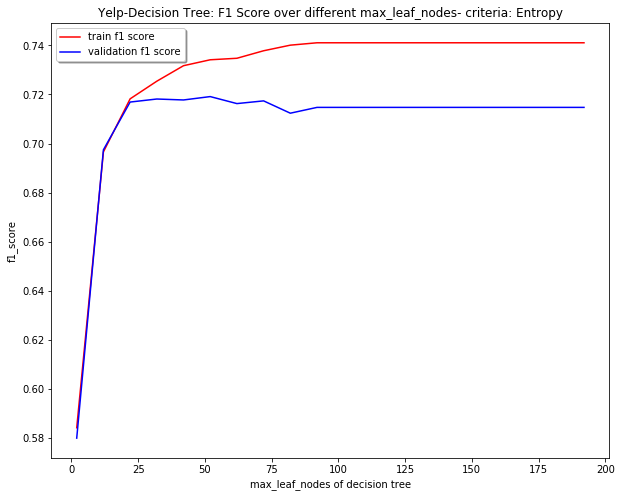


__Train set__Maximum F1 score =0.741031613294 by max_leaf_nodes=92

__Validation set__Maximum F1 score =0.719117356061 by max_leaf_nodes=52


In [64]:
f1_list_tr, f1_list_v = [], []
max_leaf_nodes_= np.arange(2,200,10)
for i in max_leaf_nodes_:
        y_pred_train = tree.DecisionTreeClassifier(criterion='entropy',max_depth=15,min_samples_leaf=91,max_leaf_nodes=i).fit(IMDB_train_bbow, IMDB_trg_train).predict(IMDB_train_bbow)
        y_pred_valid = tree.DecisionTreeClassifier(criterion='entropy',max_depth=15,min_samples_leaf=91,max_leaf_nodes=i).fit(IMDB_train_bbow, IMDB_trg_train).predict(IMDB_valid_bbow)
        f1_v = f1_score(IMDB_trg_valid, y_pred_valid, average='macro')
        f1_tr = f1_score(IMDB_trg_train, y_pred_train, average='macro')
        f1_list_v.append(f1_v)
        f1_list_tr.append(f1_tr)
ax, fig = plt.subplots(0,figsize=(10,8))
plt.plot(max_leaf_nodes_, f1_list_tr, color='r', label="train f1 score")
plt.plot(max_leaf_nodes_, f1_list_v, color='b', label="validation f1 score")
plt.legend(loc='best', shadow=True)
plt.xlabel('max_leaf_nodes of decision tree')
plt.ylabel('f1_score')
plt.title('Yelp-Decision Tree: F1 Score over different max_leaf_nodes- criteria: Entropy')
plt.show()   
print "\n__Train set__Maximum F1 score ={} by max_leaf_nodes={}" .format(max(f1_list_tr),max_leaf_nodes_[f1_list_tr.index(max(f1_list_tr))])
print "\n__Validation set__Maximum F1 score ={} by max_leaf_nodes={}" .format(max(f1_list_v),max_leaf_nodes_[f1_list_v.index(max(f1_list_v))])

In [65]:
y_pred_test = tree.DecisionTreeClassifier(criterion='entropy',max_depth=15,min_samples_leaf=91,max_leaf_nodes=52).fit(IMDB_train_fbow, IMDB_trg_train_a).predict(IMDB_test_fbow)
f1_ts = f1_score(IMDB_trg_test, y_pred_test, average='macro')   
print "\n__Test set__Best F1 score ={} by criteria: Gini, max_depth={}, min_sample_leaf={}, max_leaf_nodes=92" .format(f1_ts,20, 91)


__Test set__Best F1 score =0.715308697704 by criteria: Gini, max_depth=20, min_sample_leaf=91, max_leaf_nodes=92


In [66]:
y_pred_train = tree.DecisionTreeClassifier(criterion='entropy',max_depth=15,min_samples_leaf=91,max_leaf_nodes=52).fit(IMDB_train_fbow, IMDB_trg_train_a).predict(IMDB_train_fbow)
f1_tr = f1_score(IMDB_trg_train, y_pred_train, average='macro')   
print "\n__Test set__Best F1 score ={} by criteria: Gini, max_depth={}, min_sample_leaf={}, max_leaf_nodes=92" .format(f1_tr,20, 91)


__Test set__Best F1 score =0.741569268754 by criteria: Gini, max_depth=20, min_sample_leaf=91, max_leaf_nodes=92
